This is the process for binary classification, here we classify whether or not someone has diabetes based on the other factors in the table

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [ ]:
from google.colab import files
uploaded = files.upload()
filename = 'diabetes_prediction_dataset.csv'
df = pd.read_csv(filename)


Saving diabetes_prediction_dataset.csv to diabetes_prediction_dataset.csv


In [ ]:
#df.head()
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['smoking_history'] = le.fit_transform(df['smoking_history'])
df.dropna()
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0


In [ ]:
X = df.iloc[:, :-1]
y = df['diabetes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
y_pred_prob = rf.predict_proba(X_test)[:, 1]
print(y_pred_prob)
auc = roc_auc_score(y_test, y_pred_prob)
print("AUC:", auc)
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)
rs = roc_auc_score(y_test, y_pred_prob)
print("ROC AUC Score:", rs)
feature_importances = rf.feature_importances_

Accuracy: 0.9705666666666667
[0.   0.   0.   ... 0.   0.03 0.  ]
AUC: 0.963777153861035
F1 Score: 0.797894254978256
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98     27453
           1       0.96      0.68      0.80      2547

    accuracy                           0.97     30000
   macro avg       0.96      0.84      0.89     30000
weighted avg       0.97      0.97      0.97     30000

ROC AUC Score: 0.963777153861035


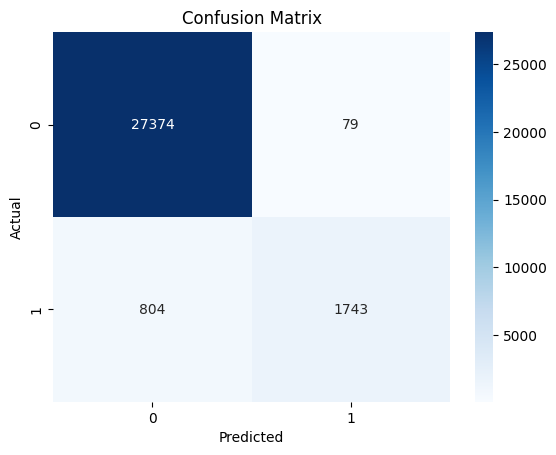

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
#print("Confusion Matrix:\n", cm)